In [2]:
import pandas as pd

df=pd.read_csv("Dataset/ptbxl/ptbxl_database.csv")
df

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21833,21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21834,21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr
21835,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,True,NaN,NaN,NaN,NaN,SVES,NaN,8,records100/21000/21836_lr,records500/21000/21836_hr


In [2]:
df.columns

Index(['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight', 'nurse',
       'site', 'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr'],
      dtype='object')

In [3]:
df['report'].unique()

array(['sinusrhythmus periphere niederspannung',
       'sinusbradykardie sonst normales ekg',
       'sinusrhythmus normales ekg', ...,
       'sinusrhythmus linkstyp periphere niederspannung linksschenkelblock 4.46                          unbestÄtigter bericht',
       'ventrikulÄre extrasystole(n) sinustachykardie linkstyp mÄssige amplitudenkriterien fÜr linkshypertrophie st & t abnorm, wahrscheinlich    anterolaterale ischÄmie oder linksbelastung 4.46                          unbestÄtigter bericht',
       'sinusrhythmus lagetyp normal t abnorm in anterioren ableitungen 4.46                          unbestÄtigter bericht Edit: INJAS 50, (ISCAS)'],
      dtype=object)

In [4]:
df['scp_codes'].unique()

array(["{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",
       "{'NORM': 80.0, 'SBRAD': 0.0}", "{'NORM': 100.0, 'SR': 0.0}", ...,
       "{'IMI': 100.0, 'ISCLA': 50.0, 'ABQRS': 0.0, 'SVARR': 0.0}",
       "{'IMI': 80.0, 'ISCLA': 100.0, 'PVC': 100.0, 'ABQRS': 0.0, 'SR': 0.0}",
       "{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'STACH': 0.0}"],
      dtype=object)

In [5]:

# Define SCP code groups based on PTB-XL labeling guide
mi_codes = ['IMI', 'AMI', 'ASMI', 'ALMI', 'ILMI', 'INMI']  # Myocardial Infarction-related
cad_codes = ['STTC', 'ISCHA', 'ISCAL', 'ISCLA']            # Ischemic/CAD related
normal_codes = ['NORM', 'SR']                              # Normal sinus rhythm

# Function to classify each row
def classify_condition(scp_str):
    try:
        scp_dict = ast.literal_eval(scp_str)
        keys = set(scp_dict.keys())
        
        # Priority: MI > CAD > Normal
        if keys & set(mi_codes):
            return "MI"
        elif keys & set(cad_codes):
            return "CAD"
        elif keys & set(normal_codes):
            return "Normal"
        else:
            return None
    except:
        return None

# Apply the classification
df['condition'] = df['scp_codes'].apply(classify_condition)

# Filter only labeled rows
filtered_df = df[df['condition'].isin(["MI", "CAD", "Normal"])]

# Display the filtered result
filtered_df

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,condition


C:\Users\estya\AppData\Local\Temp\ipykernel_3908\127335311.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=scp_code_df.head(20), x="SCP_Code", y="Count", palette="viridis")


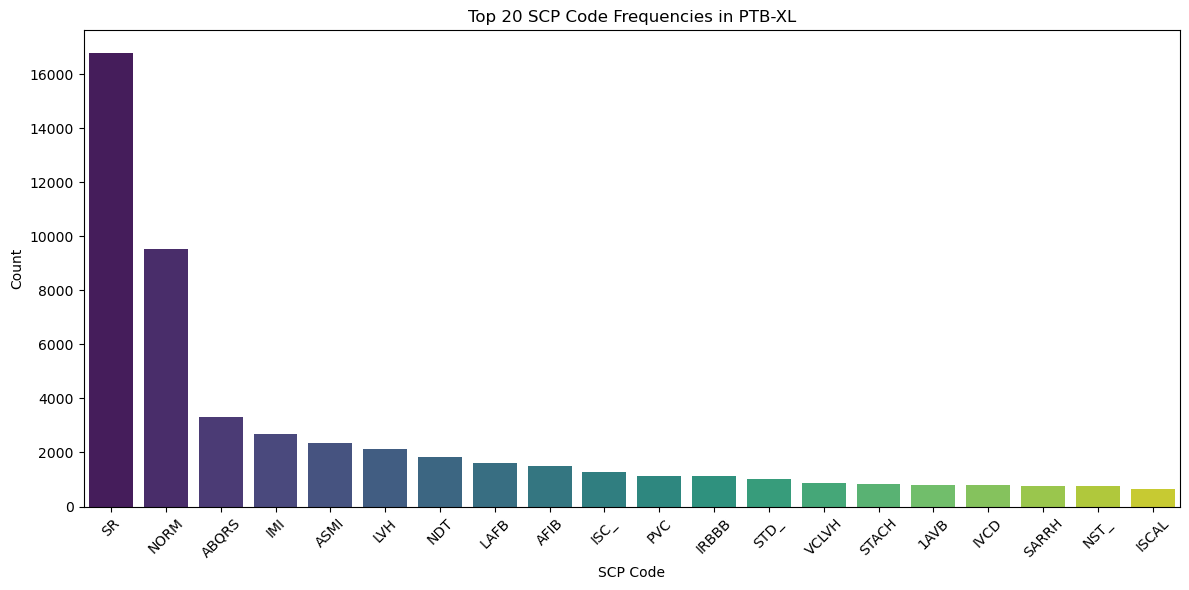

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter



# Parse the 'scp_codes' column
scp_code_series = df['scp_codes'].dropna().apply(ast.literal_eval)

# Flatten all SCP codes
flat_scp_codes = []
for scp_dict in scp_code_series:
    flat_scp_codes.extend(scp_dict.keys())

# Count frequencies
scp_code_counts = Counter(flat_scp_codes)

# Convert to DataFrame
scp_code_df = pd.DataFrame(scp_code_counts.items(), columns=["SCP_Code", "Count"])
scp_code_df = scp_code_df.sort_values(by="Count", ascending=False)

# Plot top 20 most common SCP codes
plt.figure(figsize=(12, 6))
sns.barplot(data=scp_code_df.head(20), x="SCP_Code", y="Count", palette="viridis")

plt.title("Top 20 SCP Code Frequencies in PTB-XL")
plt.xlabel("SCP Code")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
ef=pd.read_csv("merged_ecg_patient_data.csv")
ef

C:\Users\estya\AppData\Local\Temp\ipykernel_3908\1691274398.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  ef=pd.read_csv("merged_ecg_patient_data.csv")


,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,HF_power,LF_HF_ratio,dominant_freq,spectral_entropy,mean,median,std,skew,kurt,zero_crossings
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,0.129100,2.475920,3.417969,5.128917,-5.115908e-17,-0.349752,1.0,2.202134,5.745205,113
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,0.206826,1.297205,0.976562,5.101367,2.273737e-17,-0.191573,1.0,2.742948,13.005555,46
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,0.136506,2.186239,0.976562,5.194964,5.684342e-18,-0.150124,1.0,2.564642,10.432457,96
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,0.162305,1.663815,0.976562,5.260235,4.689582e-17,-0.245402,1.0,2.104261,7.027535,73
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,0.173930,1.439118,0.976562,5.388594,-1.421085e-17,-0.262932,1.0,3.268444,13.709445,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19625,21832,7954.0,63.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-05-30 14:14:25,...,0.110103,3.979517,1.464844,4.532843,-1.989520e-17,-0.051644,1.0,-0.012996,1.331489,109
19626,21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,0.115880,2.249227,4.394531,5.045452,-1.421085e-18,-0.366507,1.0,1.689690,3.695812,70
19627,21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,...,0.211572,1.234034,2.929688,5.457659,-2.557954e-17,-0.188506,1.0,4.527303,25.735880,133
19628,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,0.215685,1.796478,2.441406,5.291957,-2.700062e-17,-0.300803,1.0,1.340795,3.167604,88


In [8]:
ef.columns

Index(['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight', 'nurse',
       'site', 'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr',
       'condition', 'RR_mean', 'RR_std', 'HR', 'QRS_duration', 'PR_interval',
       'QT_interval', 'T_duration', 'R_amp', 'S_amp', 'R_S_ratio', 'Q_amp',
       'QRS_area', 'T_amp', 'T_asymmetry', 'ST_elevation', 'VLF_power',
       'LF_power', 'MF_power', 'HF_power', 'LF_HF_ratio', 'dominant_freq',
       'spectral_entropy', 'mean', 'median', 'std', 'skew', 'kurt',
       'zero_crossings'],
      dtype='object')

In [23]:
ff=pd.read_csv("lead5.csv")
ff

,RR_mean,RR_std,HR,QRS_duration,PR_interval,QT_interval,T_duration,R_amp,S_amp,R_S_ratio,...,LF_HF_ratio,dominant_freq,spectral_entropy,mean,median,std,skew,kurt,zero_crossings,filename_hr
0,938.600000,15.875768,63.924995,96.727273,NaN,397.400000,211.000000,6.405659,-1.276841,5.016801,...,2.317301,3.417969,5.146835,-4.405365e-17,-0.330362,1.0,3.139947,11.931046,67,records500/00000/00001_hr
1,1271.333333,75.371672,47.194546,74.857143,175.142857,349.428571,218.857143,8.429349,-2.171858,3.881169,...,0.584683,0.976562,5.680934,-1.136868e-17,-0.237366,1.0,4.822780,30.423770,40,records500/00000/00002_hr
2,943.800000,20.502683,63.572791,87.818182,NaN,424.000000,277.636364,7.873735,-1.682306,4.680323,...,0.729774,0.976562,5.688534,3.694822e-17,-0.255028,1.0,4.342000,23.302237,57,records500/00000/00003_hr
3,805.818182,36.316333,74.458484,89.000000,183.166667,315.333333,192.666667,5.423686,-2.969719,1.826329,...,0.639958,3.906250,5.602019,-1.634248e-17,-0.237765,1.0,2.059767,8.725269,51,records500/00000/00004_hr
4,905.200000,48.499072,66.283694,90.727273,190.363636,345.818182,189.818182,6.785335,-1.008426,6.728642,...,0.914894,3.417969,5.532861,3.836931e-17,-0.292347,1.0,4.233095,20.971877,48,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21794,556.588235,48.418590,107.799620,85.888889,NaN,6670.000000,164.000000,9.025218,-2.994513,3.013919,...,0.976179,1.953125,5.551609,-5.684342e-18,-0.120713,1.0,3.514119,19.647841,86,records500/21000/21833_hr
21795,894.000000,9.549869,67.114094,73.272727,NaN,374.909091,232.545455,7.500428,-3.227002,2.324271,...,0.270122,3.417969,5.908537,-9.237056e-18,-0.178876,1.0,3.555965,22.330564,69,records500/21000/21834_hr
21796,1022.750000,40.273285,58.665363,97.333333,181.777778,769.500000,194.250000,8.309182,-1.012435,8.207130,...,0.698930,2.929688,5.668525,-2.842171e-18,-0.132045,1.0,6.014624,39.175902,83,records500/21000/21835_hr
21797,1224.571429,636.981914,48.996734,82.250000,200.000000,375.428571,220.000000,6.041294,-3.624799,1.666656,...,0.561358,3.417969,5.852757,2.842171e-18,-0.206638,1.0,2.215919,11.748715,70,records500/21000/21836_hr


In [24]:
ff.columns  

Index(['RR_mean', 'RR_std', 'HR', 'QRS_duration', 'PR_interval', 'QT_interval',
       'T_duration', 'R_amp', 'S_amp', 'R_S_ratio', 'Q_amp', 'QRS_area',
       'T_amp', 'T_asymmetry', 'ST_elevation', 'VLF_power', 'LF_power',
       'MF_power', 'HF_power', 'LF_HF_ratio', 'dominant_freq',
       'spectral_entropy', 'mean', 'median', 'std', 'skew', 'kurt',
       'zero_crossings', 'filename_hr'],
      dtype='object')

# chnages col name for lead 5

In [25]:
# Rename columns: add 'l2_' prefix except 'filename_hr'
ff.rename(columns={col: f"l5_{col}" for col in ff.columns if col != "filename_hr"}, inplace=True)

# Save or display the modified DataFrame
print(ff.columns)

Index(['l5_RR_mean', 'l5_RR_std', 'l5_HR', 'l5_QRS_duration', 'l5_PR_interval',
       'l5_QT_interval', 'l5_T_duration', 'l5_R_amp', 'l5_S_amp',
       'l5_R_S_ratio', 'l5_Q_amp', 'l5_QRS_area', 'l5_T_amp', 'l5_T_asymmetry',
       'l5_ST_elevation', 'l5_VLF_power', 'l5_LF_power', 'l5_MF_power',
       'l5_HF_power', 'l5_LF_HF_ratio', 'l5_dominant_freq',
       'l5_spectral_entropy', 'l5_mean', 'l5_median', 'l5_std', 'l5_skew',
       'l5_kurt', 'l5_zero_crossings', 'filename_hr'],
      dtype='object')


In [27]:
ff.to_csv("lead5_prefixed.csv", index=False)


In [28]:
fd=pd.read_csv("lead5_prefixed.csv")
fd.columns

Index(['l5_RR_mean', 'l5_RR_std', 'l5_HR', 'l5_QRS_duration', 'l5_PR_interval',
       'l5_QT_interval', 'l5_T_duration', 'l5_R_amp', 'l5_S_amp',
       'l5_R_S_ratio', 'l5_Q_amp', 'l5_QRS_area', 'l5_T_amp', 'l5_T_asymmetry',
       'l5_ST_elevation', 'l5_VLF_power', 'l5_LF_power', 'l5_MF_power',
       'l5_HF_power', 'l5_LF_HF_ratio', 'l5_dominant_freq',
       'l5_spectral_entropy', 'l5_mean', 'l5_median', 'l5_std', 'l5_skew',
       'l5_kurt', 'l5_zero_crossings', 'filename_hr'],
      dtype='object')

In [19]:
# Rename columns: add 'l5_' prefix except 'filename_hr'
lf.rename(columns={col: f"l5_{col}" for col in lf.columns if col != "filename_hr"}, inplace=True)

# Show updated column names
lf.to_csv("lead5_prefixed.csv", index=False)


# Now merge Lead 2 and lead 5 one file and patiend information

In [32]:
import pandas as pd

# Load main patient data
patient_df = pd.read_csv('Dataset/ptbxl/ptbxl_database.csv')

# Load both ECG feature files (both use 'filename_hr')
ecg1 = pd.read_csv('lead2.csv')       # first ECG file
ecg2 = pd.read_csv('lead5_prefixed.csv')        # second ECG file (replace if different)

# Merge both ECG files on 'filename_hr' to combine features first
ecg_merged = pd.merge(ecg1, ecg2, on='filename_hr', how='inner')

# Merge with patient file
merged = pd.merge(patient_df, ecg_merged, on='filename_hr', how='left')

# Identify and organize feature columns
base_features = [
    'RR_mean', 'RR_std', 'HR', 'QRS_duration', 'PR_interval',
    'QT_interval', 'T_duration', 'R_amp', 'S_amp', 'R_S_ratio', 'Q_amp',
    'QRS_area', 'T_amp', 'T_asymmetry', 'ST_elevation', 'VLF_power',
    'LF_power', 'MF_power', 'HF_power', 'LF_HF_ratio', 'dominant_freq',
    'spectral_entropy', 'mean', 'median', 'std', 'skew', 'kurt',
    'zero_crossings'
]

# Build interleaved feature column order: [RR_mean, l5_RR_mean, RR_std, l5_RR_std, ...]
interleaved_features = []
for feat in base_features:
    if feat in merged.columns and f"l5_{feat}" in merged.columns:
        interleaved_features.append(feat)
        interleaved_features.append(f"l5_{feat}")
    elif feat in merged.columns:
        interleaved_features.append(feat)
    elif f"l5_{feat}" in merged.columns:
        interleaved_features.append(f"l5_{feat}")

# Define the full final column order
# Start with important IDs
id_cols = [col for col in ['ecg_id', 'patient_id'] if col in merged.columns]

# Then all remaining patient info (excluding interleaved + ids)
patient_info = [col for col in patient_df.columns if col not in id_cols + ['filename_hr']]

# Then the interleaved ECG features
final_col_order = id_cols + patient_info + interleaved_features

# Add any leftover columns not yet included
leftover_cols = [col for col in merged.columns if col not in final_col_order]
final_col_order += leftover_cols

# Reorder the DataFrame
merged = merged[final_col_order]

# Save the result
merged.to_csv('final_merged_patient_ecg.csv', index=False)
print("Final merged_patient_ecg.csv")

Final merged_patient_ecg.csv


In [3]:
fn=pd.read_csv('final_merged_patient_ecg.csv')
fn

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,l5_median,std,l5_std,skew,l5_skew,kurt,l5_kurt,zero_crossings,l5_zero_crossings,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,-0.330362,1.0,1.0,2.202134,3.139947,5.745205,11.931046,113.0,67.0,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,-0.237366,1.0,1.0,2.742948,4.822780,13.005555,30.423770,46.0,40.0,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,-0.255028,1.0,1.0,2.564642,4.342000,10.432457,23.302237,96.0,57.0,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,-0.237765,1.0,1.0,2.104261,2.059767,7.027535,8.725269,73.0,51.0,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,-0.292347,1.0,1.0,3.268444,4.233095,13.709445,20.971877,70.0,48.0,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,-0.120713,1.0,1.0,3.342983,3.514119,35.387634,19.647841,209.0,86.0,records500/21000/21833_hr
21833,21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,-0.178876,1.0,1.0,1.689690,3.555965,3.695812,22.330564,70.0,69.0,records500/21000/21834_hr
21834,21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,...,-0.132045,1.0,1.0,4.527303,6.014624,25.735880,39.175902,133.0,83.0,records500/21000/21835_hr
21835,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,-0.206638,1.0,1.0,1.340795,2.215919,3.167604,11.748715,88.0,70.0,records500/21000/21836_hr


In [35]:
fn.columns

Index(['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight', 'nurse',
       'site', 'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'RR_mean',
       'l5_RR_mean', 'RR_std', 'l5_RR_std', 'HR', 'l5_HR', 'QRS_duration',
       'l5_QRS_duration', 'PR_interval', 'l5_PR_interval', 'QT_interval',
       'l5_QT_interval', 'T_duration', 'l5_T_duration', 'R_amp', 'l5_R_amp',
       'S_amp', 'l5_S_amp', 'R_S_ratio', 'l5_R_S_ratio', 'Q_amp', 'l5_Q_amp',
       'QRS_area', 'l5_QRS_area', 'T_amp', 'l5_T_amp', 'T_asymmetry',
       'l5_T_asymmetry', 'ST_elevation', 'l5_ST_elevation', 'VLF_power',
       'l5_VLF_power', 'LF_power', 'l5_LF_power', 'MF_power', 'l5_MF_power',
       'HF_power', '